# 10 Convolutional Neural Networks
CNNs) are a specialized type of artificial neural network designed for processing grid-like data, such as images. They are particularly well-suited for computer vision tasks due to their ability to automatically learn hierarchical representations from raw pixel values.
CNNs have been highly successful in various applications, such as image classification, object detection, image segmentation, and more.

In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

1. Dataset Preparation:
* Download and preprocess the Caltech-256 dataset. You can use the tensorflow_datasets library to load the dataset conveniently.
* Normalize the pixel values of the images to the range [0, 1].
* Split the dataset into training and testing sets.

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='/content/data/',

)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /content/data/caltech101/3.0.1.incompleteEJF2FK/caltech101-train.tfrecord*...:   0%|          | 0/30…

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling /content/data/caltech101/3.0.1.incompleteEJF2FK/caltech101-test.tfrecord*...:   0%|          | 0/608…

Dataset caltech101 downloaded and prepared to /content/data/caltech101/3.0.1. Subsequent calls will reuse this data.


2. Build the CNN Model:
Define a CNN model with the following architecture:
* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [18]:
import tensorflow as tf
from keras import layers, models
from keras.applications import VGG16

# Cargar el modelo VGG16 previamente entrenado en ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in base_model.layers:
    layer.trainable = False

# Crear un modelo personalizado basado en la salida de VGG16
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Este es el modelo que entrenaremos
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
77/77 [==============================] - 24s 228ms/step - loss: 4.5904 - accuracy: 0.0694 - val_loss: 3.7923 - val_accuracy: 0.2010
Epoch 2/50
77/77 [==============================] - 13s 162ms/step - loss: 3.3906 - accuracy: 0.2026 - val_loss: 2.6282 - val_accuracy: 0.4526
Epoch 3/50
77/77 [==============================] - 13s 165ms/step - loss: 2.5230 - accuracy: 0.3611 - val_loss: 2.0274 - val_accuracy: 0.5588
Epoch 4/50
77/77 [==============================] - 13s 163ms/step - loss: 1.9340 - accuracy: 0.4943 - val_loss: 1.5373 - val_accuracy: 0.6601
Epoch 5/50
77/77 [==============================] - 13s 163ms/step - loss: 1.6272 - accuracy: 0.5613 - val_loss: 1.4581 - val_accuracy: 0.6601
Epoch 6/50
77/77 [==============================] - 13s 164ms/step - loss: 1.3753 - accuracy: 0.6172 - val_loss: 1.2208 - val_accuracy: 0.7042
Epoch 7/50
77/77 [==============================] - 13s 158ms/step - loss: 1.

3. Training the Model:
* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

4. Understanding Parameter Sharing and Local Receptive Fields:
* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [19]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 27612582


5. Evaluation and Interpretation:
* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [20]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 2s 120ms/step - loss: 1.1198 - accuracy: 0.7533
Accuracy on the test set: 75.33%


1/1 [==============================] - 0s 142ms/step


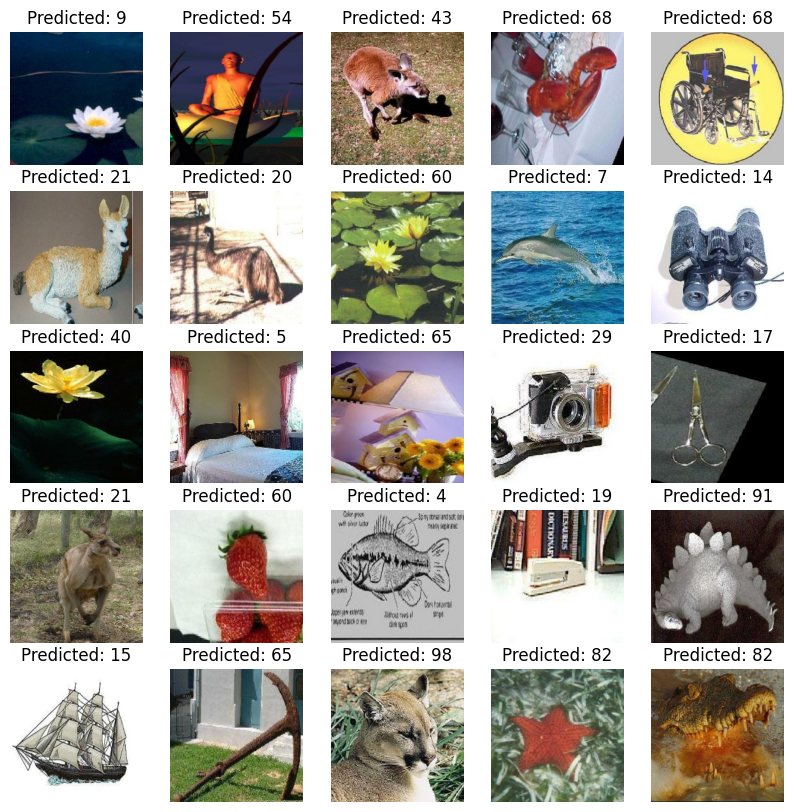

In [21]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

6. Pick a sample image and show the feature maps activated by the convolutional layers

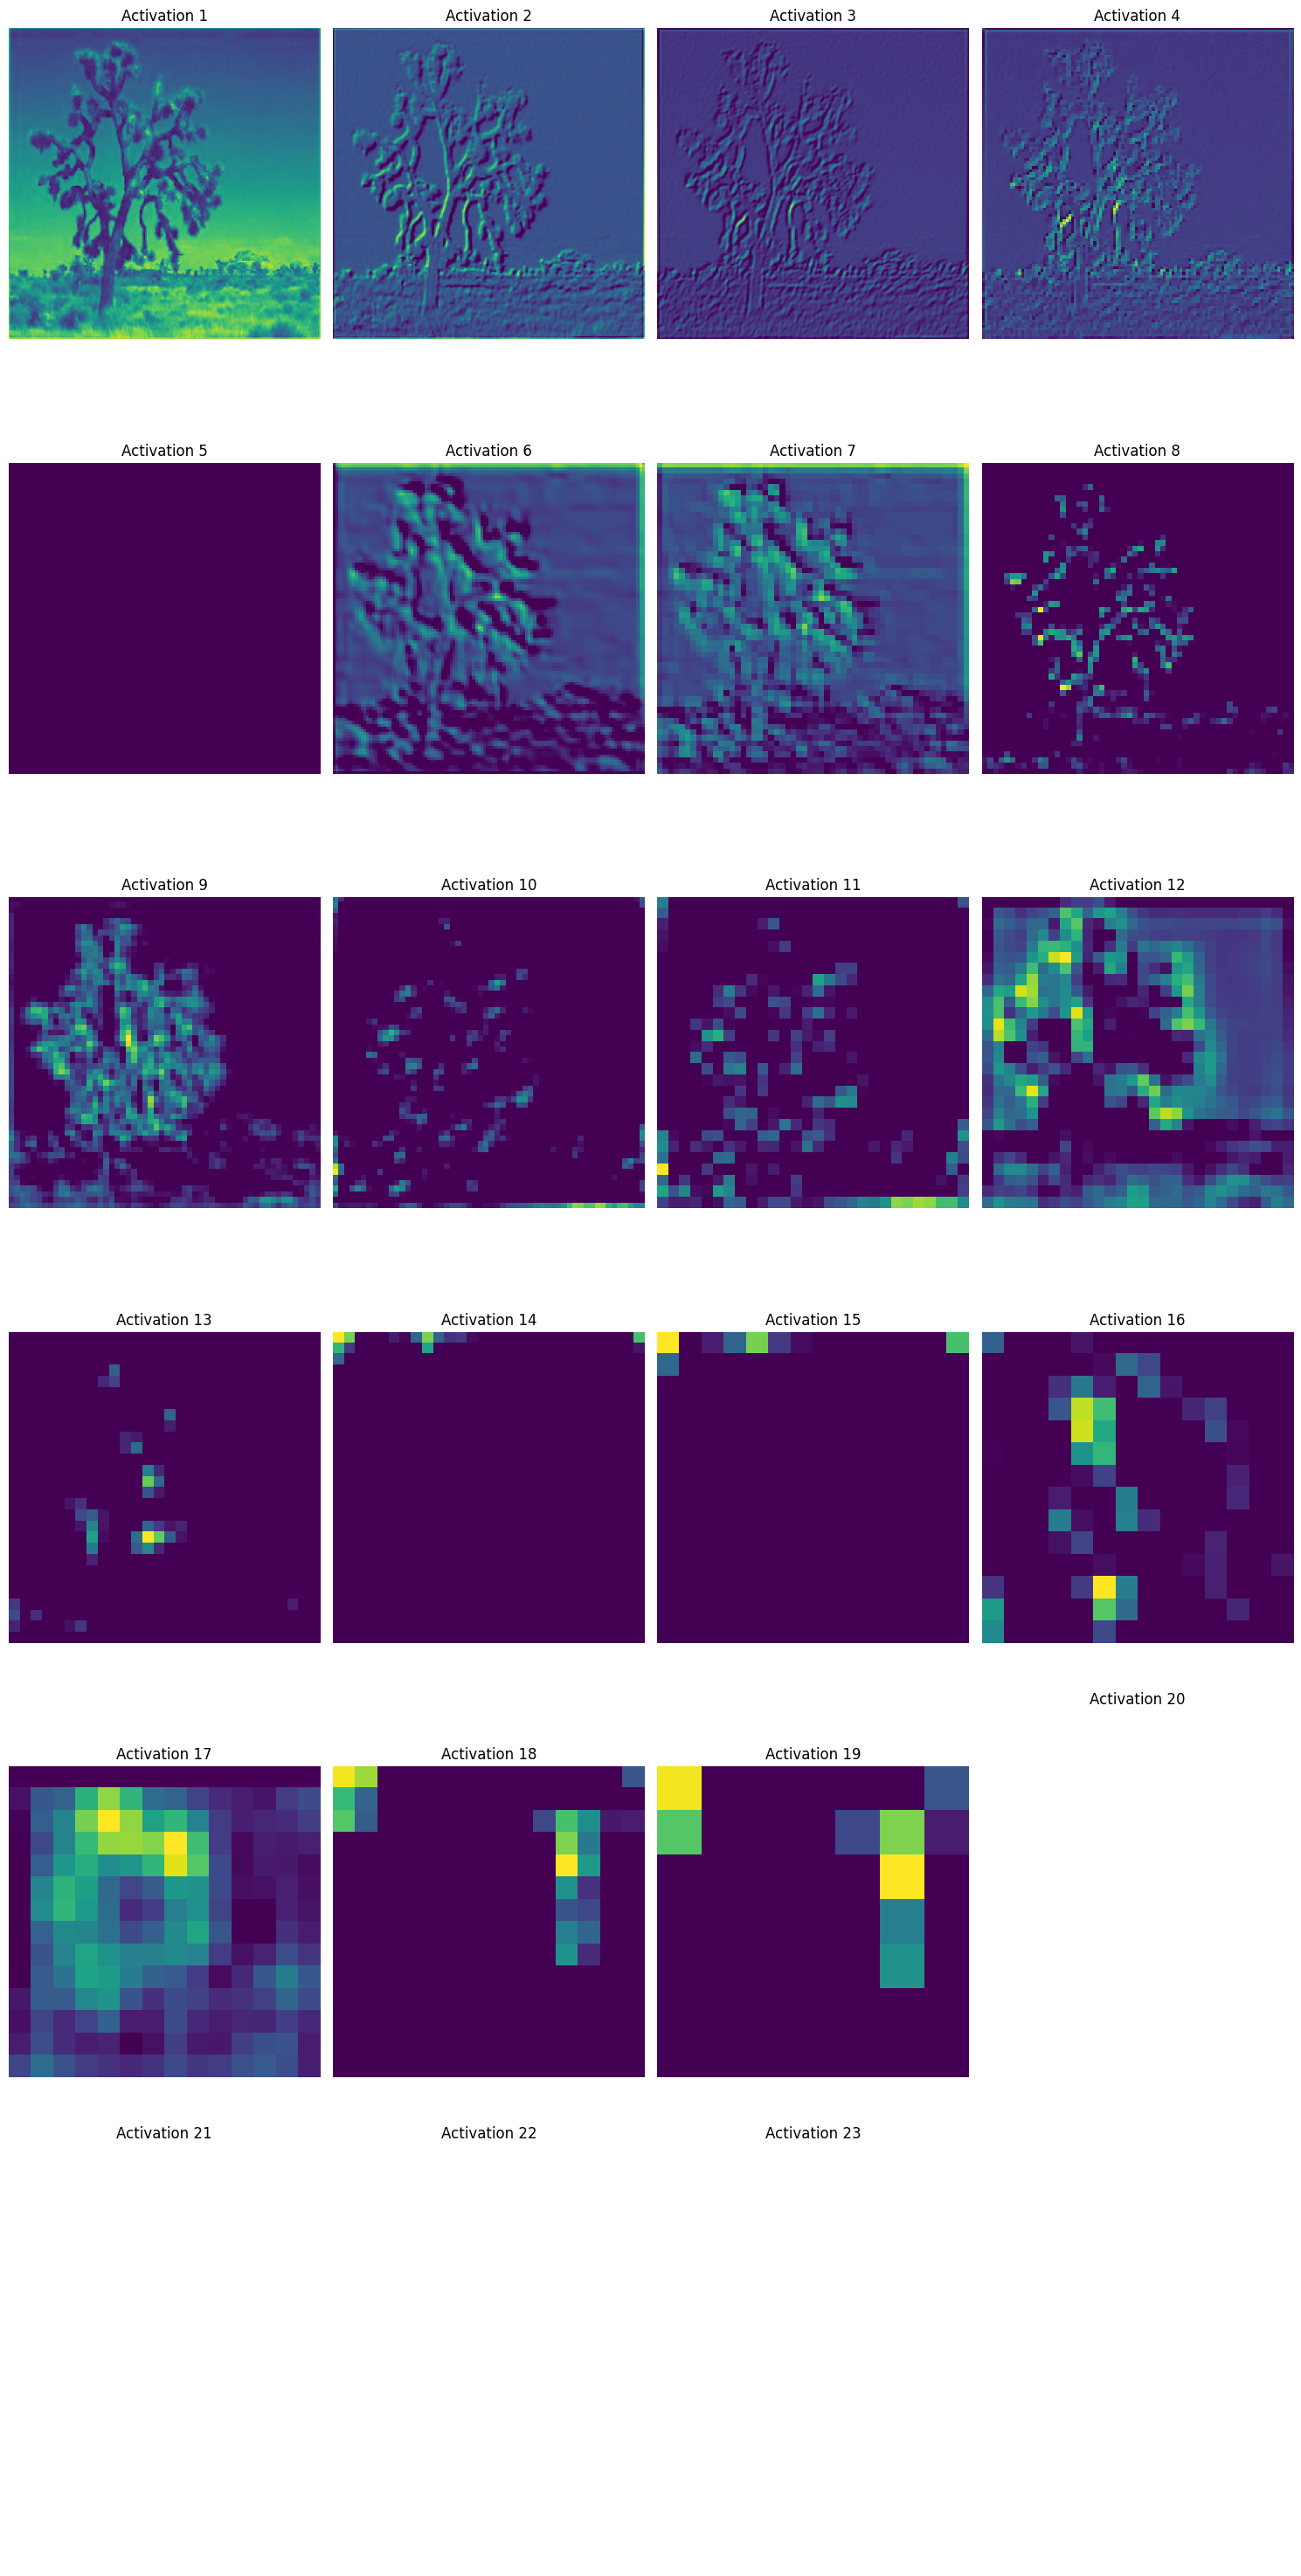

In [23]:
import matplotlib.pyplot as plt

# Calculate the number of activations to visualize
num_activations = len(activations)

# Set up the number of rows and columns for the grid
cols = 4
rows = int(num_activations / cols) + (num_activations % cols > 0)

# Create a plot to visualize the activations
plt.figure(figsize=(15, 5 * rows))
for i, activation in enumerate(activations):
    plt.subplot(rows, cols, i + 1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [24]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))

In [25]:
s = sample_image[:1]